# Linear Regression Implementation

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
# from sklearn.datasets import load_boston
from sklearn.datasets import fetch_openml

boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame

print(df.head())


      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [42]:
print("Number of columns:", df.shape[1])
print("Column names:", df.columns.tolist())
df = df.drop(columns=["MEDV"])

Number of columns: 14
Column names: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [43]:
print("Number of columns:", df.shape[1])
print("Column names:", df.columns.tolist())

Number of columns: 13
Column names: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [45]:
# Independent features and dependent features
X=df
y=boston.target

In [47]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(354, 13) (152, 13)
(354,) (152,)


In [48]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)

[[-0.41425879 -0.50512499 -1.29214218 ...  0.18727079  0.39651419
  -1.01531611]
 [-0.40200818 -0.50512499 -0.16208345 ... -0.21208981  0.3870674
  -0.05366252]
 [-0.39721053 -0.50512499 -0.60948856 ... -0.16771641  0.42854113
  -0.31132373]
 ...
 [-0.41604586  3.03838247 -1.3166773  ... -0.56707702  0.35987906
  -0.90549329]
 [ 0.92611293 -0.50512499  1.00549958 ...  0.8528718  -2.87841346
   1.52750437]
 [-0.39030549 -0.50512499 -0.37135358 ...  1.16348561 -3.32828832
  -0.25218837]]
[[-0.406801   -0.50512499 -1.02225586 ... -0.74457062  0.41241246
  -0.47605794]
 [-0.41105674  1.26662874 -0.68165068 ... -0.30083661  0.42854113
  -1.25185755]
 [-0.4051199  -0.50512499  2.39678516 ...  0.8084984   0.35031705
   0.79535229]
 ...
 [-0.35439903 -0.50512499 -0.71195877 ... -0.38958342  0.25688594
  -1.09697922]
 [ 0.25423453 -0.50512499  1.00549958 ...  0.8528718  -2.98970133
   0.53487511]
 [ 0.77732457 -0.50512499  1.00549958 ...  0.8528718   0.33199949
   0.56585078]]


In [49]:
# model training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score   
lr = LinearRegression()
lr.fit(X_train, y_train)    
y_pred = lr.predict(X_test)
print(y_pred)


[28.64896005 36.49501384 15.4111932  25.40321303 18.85527988 23.14668944
 17.3921241  14.07859899 23.03692679 20.59943345 24.82286159 18.53057049
 -6.86543527 21.80172334 19.22571177 26.19191985 20.27733882  5.61596432
 40.44887974 17.57695918 27.44319095 30.1715964  10.94055823 24.02083139
 18.07693812 15.934748   23.12614028 14.56052142 22.33482544 19.3257627
 22.16564973 25.19476081 25.31372473 18.51345025 16.6223286  17.50268505
 30.94992991 20.19201752 23.90440431 24.86975466 13.93767876 31.82504715
 42.56978796 17.62323805 27.01963242 17.19006621 13.80594006 26.10356557
 20.31516118 30.08649576 21.3124053  34.15739602 15.60444981 26.11247588
 39.31613646 22.99282065 18.95764781 33.05555669 24.85114223 12.91729352
 22.68101452 30.80336295 31.63522027 16.29833689 21.07379993 16.57699669
 20.36362023 26.15615896 31.06833034 11.98679953 20.42550472 27.55676301
 10.94316981 16.82660609 23.92909733  5.28065815 21.43504661 41.33684993
 18.22211675  9.48269245 21.19857446 12.95001331 21.

In [57]:
# cross validation
from sklearn.model_selection import cross_val_score
regression = LinearRegression()
regression.fit(X_train, y_train)
mse=cross_val_score(regression, X_train, y_train, scoring="neg_mean_squared_error", cv=5)

In [58]:
np.mean(mse)

np.float64(-25.977777430926295)

In [59]:
# prediction
reg_predict=regression.predict(X_test)


In [61]:
reg_predict

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

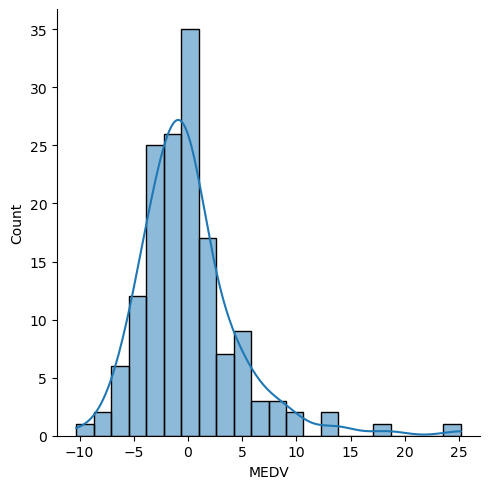

In [63]:
# Visualize
#dusplot
#sns.displot(y_test - reg_predict, kind='kde')
sns.displot(y_test - reg_predict, kde=True)


In [66]:
# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("MAE:", mean_absolute_error(y_test, reg_predict))
print("MSE:", mean_squared_error(y_test, reg_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test, reg_predict)))
print("R2:", r2_score(y_test, reg_predict))


MAE: 3.1627098714574053
MSE: 21.517444231177205
RMSE: 4.6386899261728205
R2: 0.7112260057484934
